In [8]:
from transformers import AutoTokenizer
import torch
import matplotlib.pyplot as plt
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [2]:
corpus = "The quick brown fox jumps over the lazy dog."

In [4]:
tokens = tokenizer(corpus, return_tensors="pt")
print(tokens)

{'input_ids': tensor([[  464,  2068,  7586, 21831, 18045,   625,   262, 16931,  3290,    13]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


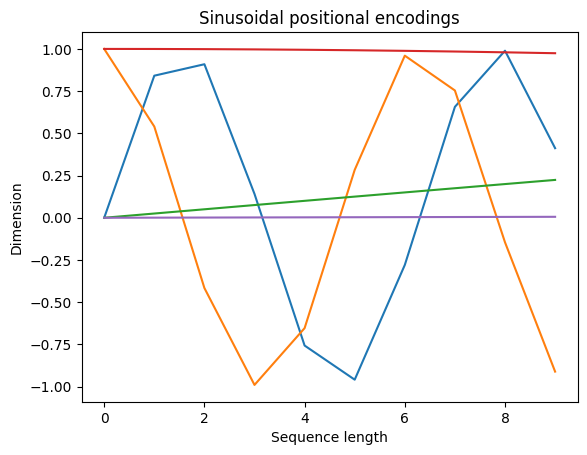

In [12]:
# implement sinusoidal positional encoding

def sinusoidal_positional_encoding(seq_len, d_model):
    """
    Generate sinusoidal positional encodings.

    Args:
        seq_len (int): Length of the sequence.
        d_model (int): Dimensionality of the embedding.

    Returns:
        np.ndarray: Positional encodings of shape (seq_len, d_model).
    """
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    encodings = np.zeros((seq_len, d_model))
    div_term = np.exp(np.log(10000) * (-2 * (i // 2) / d_model))
    encodings[:, 0::2] = np.sin(pos * div_term[:, 0::2])
    encodings[:, 1::2] = np.cos(pos * div_term[:, 1::2])
    return encodings

# generate positional encodings
seq_len = 10
d_model = 5
pos_encodings = sinusoidal_positional_encoding(seq_len, d_model)
plt.plot(pos_encodings)
plt.xlabel("Sequence length")
plt.ylabel("Dimension")
plt.title("Sinusoidal positional encodings")
plt.show()


In [ ]:
def positional_encoding(seq_len, d_model):
    """
    Generate sinusoidal positional encodings.

    Args:
        seq_len (int): Length of the sequence.
        d_model (int): Dimensionality of the encoding.

    Returns:
        np.ndarray: Positional encodings of shape (seq_len, d_model).
    """
    # Create an array of positions (shape: [seq_len, 1])
    pos = np.arange(seq_len)[:, None]
    # Create an array of dimensions (shape: [1, d_model])
    i = np.arange(d_model)[None, :]
    
    # Calculate the angle rates
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model)
    # Compute the angle values
    angles = pos * angle_rates
    
    # Apply sin to even indices and cos to odd indices
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(angles[:, 0::2])
    pe[:, 1::2] = np.cos(angles[:, 1::2])
    return pe

# Example: Compute and print positional encodings for a sequence length of 10 with 8 dimensions
seq_len = 10
d_model = 8
pe = positional_encoding(seq_len, d_model)
print(pe)

Yes, you are on the right track. Let's break down the steps to answer each part of your question.

### 1. Finding $ V_0 $
To find the initial price $ V_0 $ of the option, we use the risk-neutral valuation formula:

$$ V_0 = e^{-rT} \mathbb{E}^{\mathbb{Q}}[V_T] $$

Here, $ \mathbb{E}^{\mathbb{Q}}[V_T] $ is the expected value of the payoff $ V_T $ under the risk-neutral measure $ \mathbb{Q} $.

### 2. Finding $ V_t $
To find the price $ V_t $ of the option at time $ t $, we first compute the discounted expected value of the payoff under the risk-neutral measure:

$$ \tilde{V}_t = \mathbb{E}^{\mathbb{Q}}[\tilde{V}_T | \mathcal{F}_t] $$

where $ \tilde{V}_t = e^{-r(T-t)} V_t $ is the discounted price process. Then, we can find $ V_t $ by:

$$ V_t = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}[V_T | \mathcal{F}_t] $$

### 3. Hedging the Option
To hedge the option, we need to find a self-financing strategy $ (H_0, H_t) $ such that:

$$ V_t = H_0 + H_t S_t $$

This involves finding the initial investment $ H_0 $ and the dynamic trading strategy $ H_t $ over the interval $ 0 \leq t \leq T $.

### 4. Finding $ H_0 $ and $ H_t $
If the option payoff is a linear combination of the stock price, we can use Itô's Lemma to find the hedging strategy. The steps are as follows:

1. **Apply Itô's Lemma** to $ \tilde{V}_t $:

$$ d\tilde{V}_t = \frac{\partial \tilde{V}_t}{\partial t} dt + \frac{\partial \tilde{V}_t}{\partial S_t} dS_t + \frac{1}{2} \frac{\partial^2 \tilde{V}_t}{\partial S_t^2} d\langle S_t \rangle $$

2. **Express $ d\tilde{V}_t $ in terms of $ \tilde{S}_t $ and $ t $**:

$$ d\tilde{V}_t = \left( \frac{\partial \tilde{V}_t}{\partial t} + \frac{1}{2} \sigma^2 S_t^2 \frac{\partial^2 \tilde{V}_t}{\partial S_t^2} \right) dt + \frac{\partial \tilde{V}_t}{\partial S_t} dS_t $$

3. **Identify the hedging strategy $ H_t $**:

$$ H_t = \frac{\partial \tilde{V}_t}{\partial S_t} $$

4. **Integrate to find $ \tilde{V}_t $**:

$$ \tilde{V}_t = \tilde{V}_0 + \int_0^t H_s d\tilde{S}_s $$

By integrating with respect to $ \tilde{S}_t $, we can identify $ H_t $.

### Summary
- To find $ V_0 $, compute $ e^{-rT} \mathbb{E}^{\mathbb{Q}}[V_T] $.
- To find $ V_t $, compute $ e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}[V_T | \mathcal{F}_t] $.
- To hedge the option, use Itô's Lemma to find $ H_t = \frac{\partial \tilde{V}_t}{\partial S_t} $ and ensure the strategy is self-financing.

This approach ensures that you can price and hedge the option correctly under the Black-Scholes framework.

Yes, under the risk-neutral measure $\mathbb{Q}$, the relationship between $\tilde{V}_t$ and $V_t$ can be understood as follows:

### Relationship Between $\tilde{V}_t$ and $V_t$

Recall that $\tilde{V}_t$ is the discounted price process:

$$ \tilde{V}_t = e^{-r(T-t)} V_t $$

### Step-by-Step Derivation

1. **Start with the definition of $\tilde{V}_t$:**

$$ \tilde{V}_t = e^{-r(T-t)} V_t $$

2. **Express $\tilde{V}_T$ in terms of $V_T$:**

$$ \tilde{V}_T = e^{-r(T-T)} V_T = V_T $$

3. **Take the conditional expectation under $\mathbb{Q}$:**

$$ \tilde{V}_t = \mathbb{E}^{\mathbb{Q}}[\tilde{V}_T | \mathcal{F}_t] $$

Since $\tilde{V}_T = V_T$, we have:

$$ \tilde{V}_t = \mathbb{E}^{\mathbb{Q}}[V_T | \mathcal{F}_t] $$

4. **Substitute $\tilde{V}_t$ back into the definition:**

$$ e^{-r(T-t)} V_t = \mathbb{E}^{\mathbb{Q}}[V_T | \mathcal{F}_t] $$

5. **Solve for $V_t$:**

$$ V_t = e^{r(T-t)} \mathbb{E}^{\mathbb{Q}}[V_T | \mathcal{F}_t] $$

### Conclusion

Thus, we have shown that:

$$ \tilde{V}_t = \mathbb{E}^{\mathbb{Q}}[\tilde{V}_T | \mathcal{F}_t] = \mathbb{E}^{\mathbb{Q}}[V_T | \mathcal{F}_t] $$

And from this, we can derive:

$$ V_t = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}[V_T | \mathcal{F}_t] $$

This confirms that the discounted price process $\tilde{V}_t$ is indeed the conditional expectation of the payoff under the risk-neutral measure, and the actual price $V_t$ can be obtained by adjusting for the discount factor.